<a href="https://colab.research.google.com/github/takahiromitsui/oi-ai-hackathon-berlin-july2024/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Overview

iMouse is a digital tool designed to automate the observation of mice in a cage.

As part of the iMouse hackathon, we aimed to create a model that can identify individual mice within a home cage.

To simplify the model, we assumed that the mice would be marked as plain (no mark), striped, or dotted.

Our team trained the model using images of plain, striped, and dotted mice. The model can predict which mouse is present in a given image.

# 2. Approach

## Day 1
Since we didn't have input images of mice, we collected images of BALB/c mice from Google to use as plain images.

Next, we modified these images to add either stripes or dots.

In total, we created 30 images (10 for each category: plain, striped, and dotted) to train our model.

Our team labeled the images using [label-studio](https://labelstud.io), generating XML files and JPGs.

Finally, we trained the model using [detecto](https://detecto.readthedocs.io/en/latest).

## Day 2
We obtained 5 videos of home cages, each containing 2 mice (one dotted and one striped).

We converted these videos into 10-second image frames.

Then, we annotated 339 images using [roboflow](https://roboflow.com).

After formatting them into 640x640 pixel images, we trained a YOLOv8 model with these images.

The data was split into Train/Validation/Precision sets with a ratio of 70%, 20%, and 10%, respectively.


Check the final model [here](https://universe.roboflow.com/animalidentification-th83a/animal_identification).

# Day1

## 3. Model training

### 3.1. Access to google drive images

In [1]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)
! ls

Mounted at /content/drive
drive  sample_data


In [2]:
%cd drive/MyDrive/animal_indentification/

/content/drive/MyDrive/animal_indentification


### 3.2. Train a detecto's model with images





In [ ]:
# install detecto
!pip3 install detecto

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from detecto import core, utils, visualize
dataset = core.Dataset('images')
model = core.Model(['plain', 'striped', 'dotted'])

In [ ]:
model.fit(dataset)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:12<00:00,  3.99it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:12<00:00,  3.94it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.89it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.85it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.81it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.78it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.75it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.74it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.73it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:13<00:00,  3.73it/s]


### 3.3 Save the model

In [ ]:
model.save('mode_weights.pth')

## 4. Prediction and Visualisation

In [5]:
from detecto import core, utils, visualize
image = utils.read_image('plain/images/df10cb9f-plain10.jpg')

### 4-1. Plain mouse

tensor([0.2497, 0.6102, 0.3165])


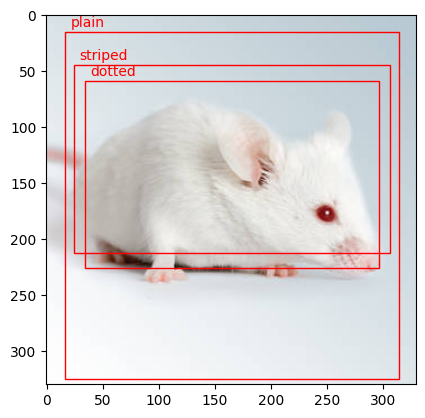

In [8]:
model = core.Model.load('mode_weights.pth', ['plain', 'striped', 'dotted'])
labels, boxes, scores = model.predict_top(image)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

### 4.2 Dotted mouse

tensor([0.3348, 0.4901, 0.4701])


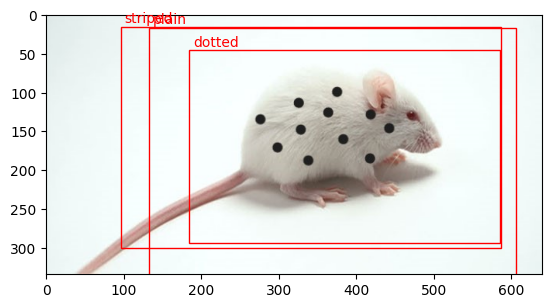

In [11]:
dotted_image = utils.read_image('dotted/images/02d511c1-dotted7.jpg')
labels, boxes, scores = model.predict_top(dotted_image)
print(scores)
visualize.show_labeled_image(dotted_image, boxes, labels)

### 4.3 Striped mouse

tensor([0.1902, 0.4128, 0.6072])


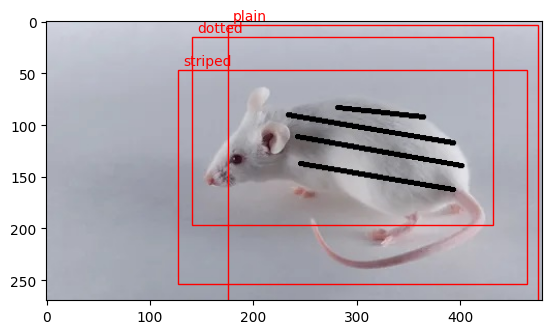

In [13]:
striped_image = utils.read_image('striped/images/b7bdd05c-striped9.jpg')
labels, boxes, scores = model.predict_top(striped_image)
print(scores)
visualize.show_labeled_image(striped_image, boxes, labels)

# Day2 (YOLO 8)

### 1. Convert video into images

In [2]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)
! ls

Mounted at /content/drive
drive  sample_data


In [6]:
!ls

MyDrive  Othercomputers


In [8]:
%cd MyDrive

/content/drive/MyDrive


In [12]:
!unzip TransferXL-08vK0592Rf7dy0.zip

Archive:  TransferXL-08vK0592Rf7dy0.zip
Downloaded using TransferXL
 extracting: 446197-video.h264.mp4   
 extracting: 446210-video.h264.mp4   
 extracting: 446213-video.h264.mp4   
 extracting: 446215-video.h264.mp4   
 extracting: 446219-video.h264.mp4   
 extracting: 446224-video.h264.mp4   


In [19]:
VIDEO_DIR_PATH = "mouse_videos/videos"
IMAGE_DIR_PATH = "mouse_viodes/images"
FRAME_STRIDE = 10

In [15]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.7 MB/s eta 0:00:00


In [17]:
!pip install tqdm

In [20]:
import supervision as sv
from tqdm.notebook import tqdm

video_paths = sv.list_files_with_extensions(
    directory=VIDEO_DIR_PATH,
    extensions=["mov", "mp4"])

TEST_VIDEO_PATHS, TRAIN_VIDEO_PATHS = video_paths[:2], video_paths[2:]

for video_path in tqdm(TRAIN_VIDEO_PATHS):
    video_name = video_path.stem
    image_name_pattern = video_name + "-{:05d}.png"
    with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
        for image in sv.get_video_frames_generator(source_path=str(video_path), stride=FRAME_STRIDE):
            sink.save_image(image=image)

  0%|          | 0/3 [00:00<?, ?it/s]

In [25]:
IMAGE_DIR_PATH = "yolo_raw_data/images"

In [26]:
image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

image count: 347


In [27]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

### 2. Check generated images

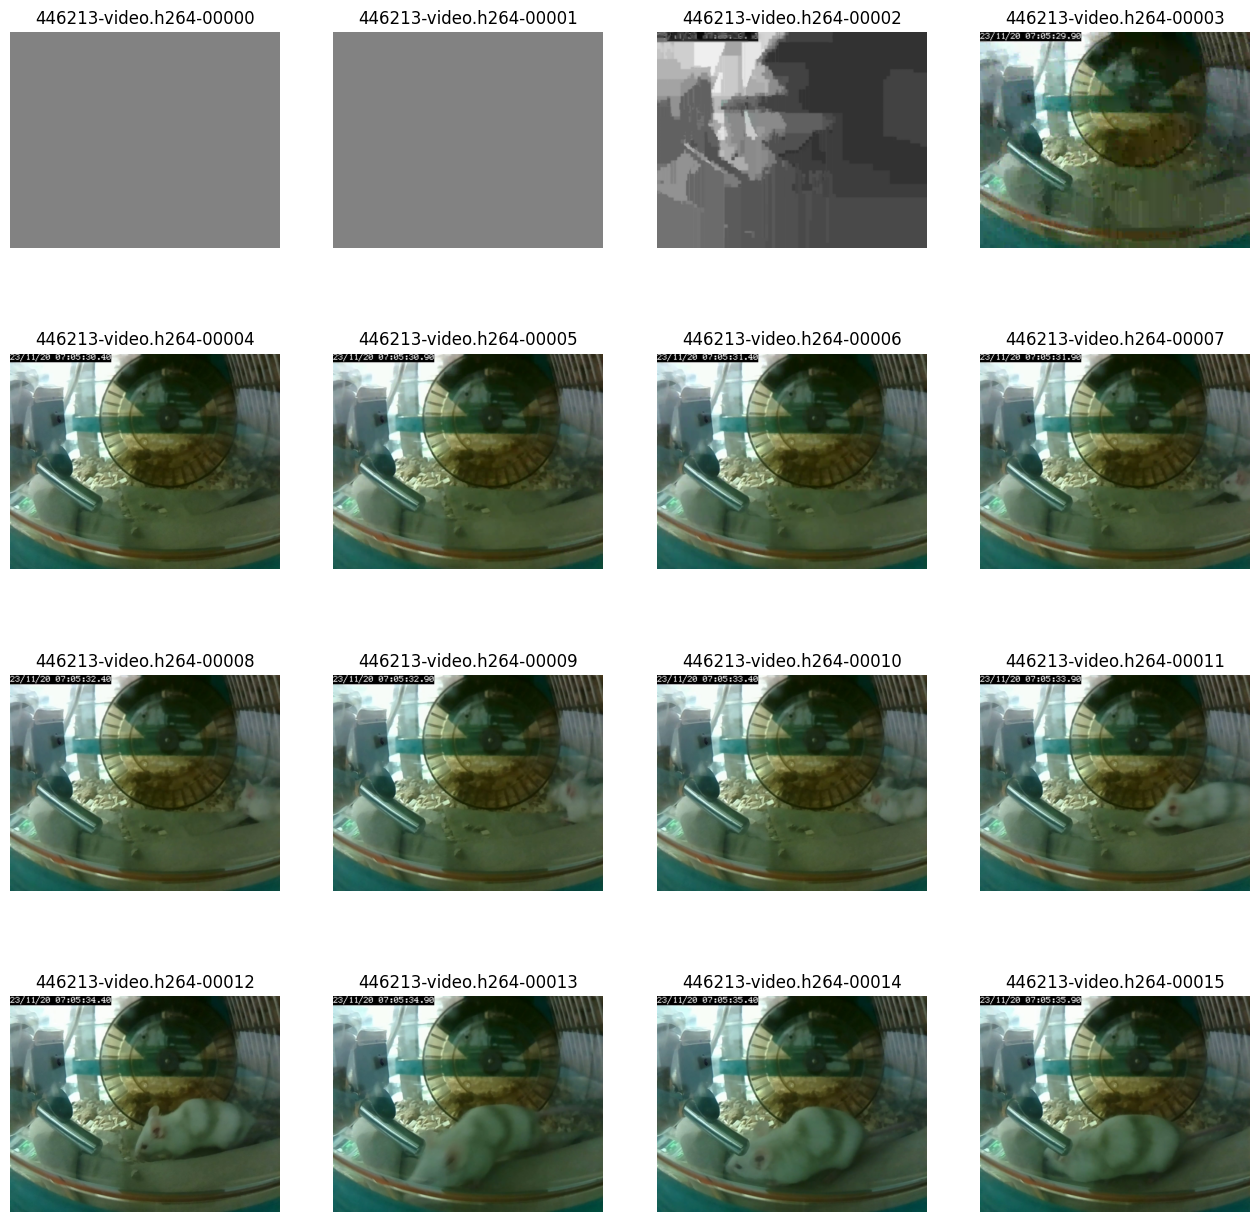

In [28]:
import cv2
import supervision as sv


titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

### 3. Annotation

We annonated images here (https://app.roboflow.com/animalidentification-th83a/animal_identification/1).

### 4. Training

In [ ]:
!pip install ultralytics==8.0.196

In [24]:
!pip install roboflow
from roboflow import Roboflow

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to animal_identification-1 in yolov8:: 100%|██████████| 690/690 [00:00<00:00, 8003.56it/s]


In [ ]:
api_key=""
workspace="animalidentification-th83a"

In [ ]:
rf = Roboflow(api_key=api_key)
project = rf.workspace(workspace).project(workspace)
version = project.version(1)
dataset = version.download("yolov8")

In [36]:
!yolo task=detect mode=train model=yolov8s.pt data=animal_identification-1/data.yaml epochs=25 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 243MB/s]
New https://pypi.org/project/ultralytics/8.2.56 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=animal_identification-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_

### 5. Result

Total images: 339
Train data : 70 %
Validation data : 20 %
Precision data: 10 %

--------------------------
* mAP(mAP is equal to the average of the Average Precision metric across all classes in a model): 88.8%

* Precision(Precision measures how often your model's predictions are correct.): 89.5 %

* Recall(Recall measures what percentage of relevant labels were successfully identified.) : 81.6 %





Example

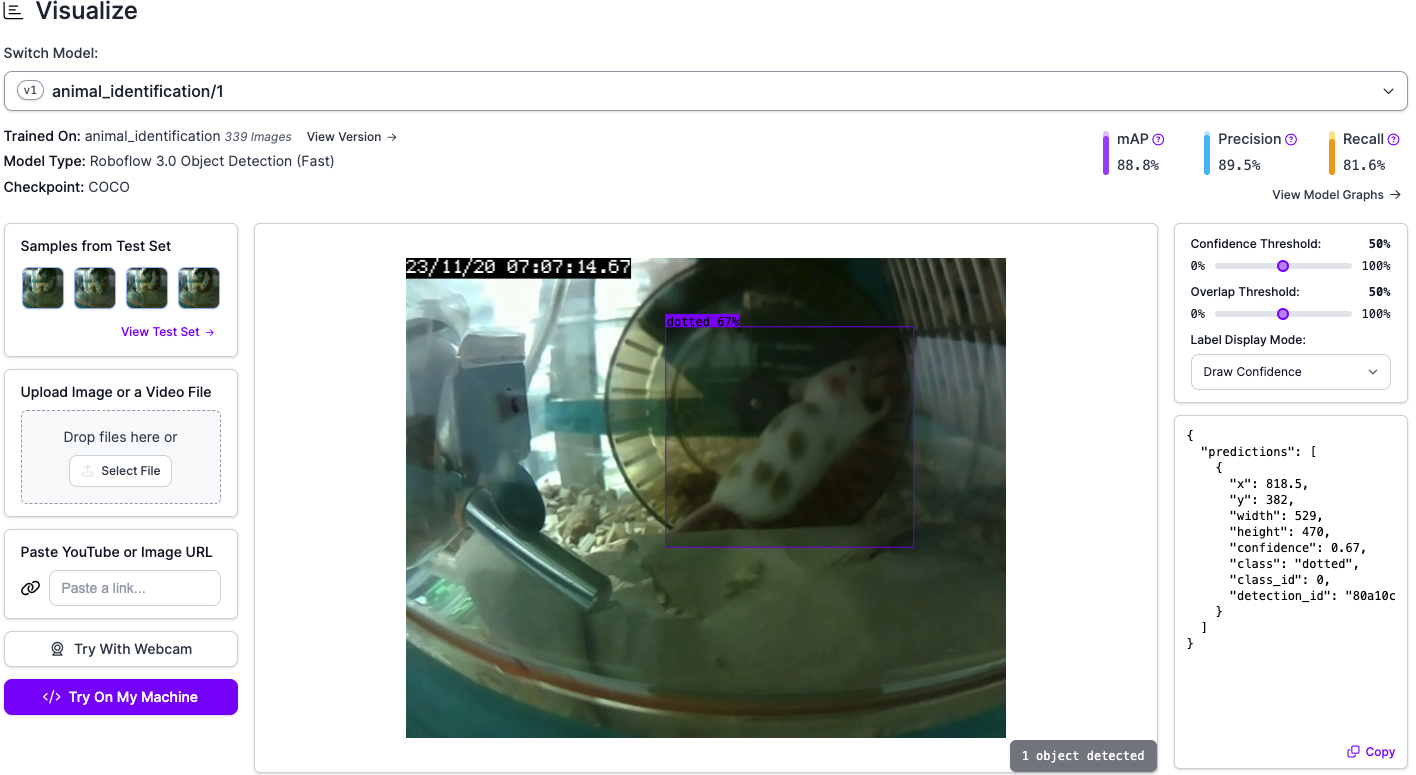

Additional result

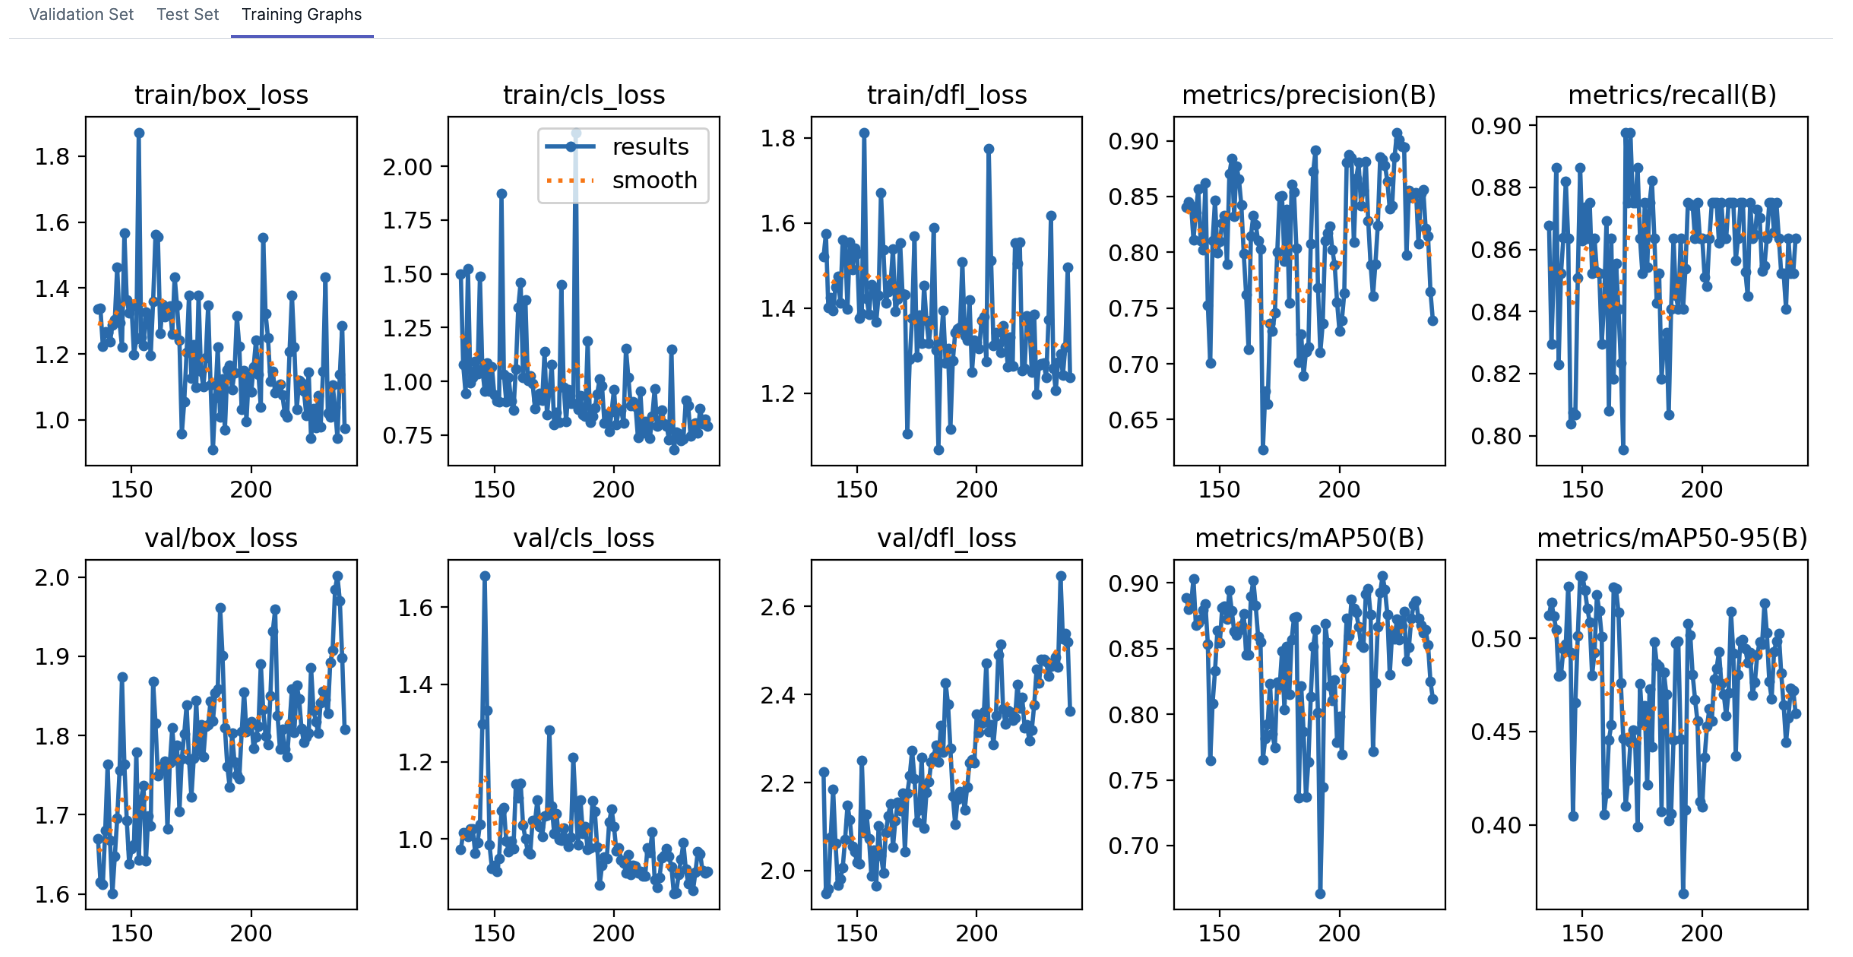

Link for the project

https://universe.roboflow.com/animalidentification-th83a/animal_identification